## Introduction to Missing Data Diagnostics and Treatment

### Speaker: Ricardo J. Serrano

### Objectives

*  What is missing data?

*  Missing data mechanisms (MCAR, MAR, MNAR)

*  How to treat missing data the right way

### What is missing data?

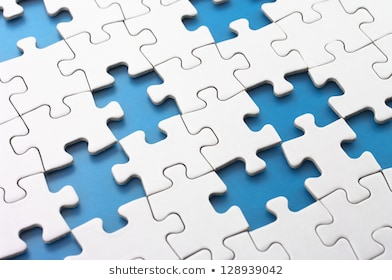

### Missing Data Mechanisms

*  Missing Completely at Random (MCAR)

*  Missing at Random (MAR)

*  Missing Not at Random (MNAR)

Source: Rubin (1976)

### Missing Completely at Random (MCAR)

*  Locations of missing values in the dataset are purely random, they do not depend on any other data.

*  Example: A weather sensor is measuring temperature and sending the data to a database. There are some missing entries in the database for when the sensor broke down.

### Missing at Random (MAR)

*  Locations of missing values in the dataset depend on some other, observed data.

*  There are some missing temperature values in the database for when the sensor was switched off for maintenance. As the maintenance team never work on the weekends, the locations of missing values depend on the day of the week.

### Missing Not at Random (MNAR)

*  Locations of missing values in the dataset depend on the missing values themselves.

*  When it's extremely cold, the weather sensor freezes and stops working. So, it does not record very low temperatures. Thus, the locations of missing values in the temperature variable depend on the values of this variable themselves.

### Why detecting the missing data mechanism is important?

*  Imputation methods make assumptions on the type of missing data mechanism.

*  Justifies the strategy to deal with missing data.

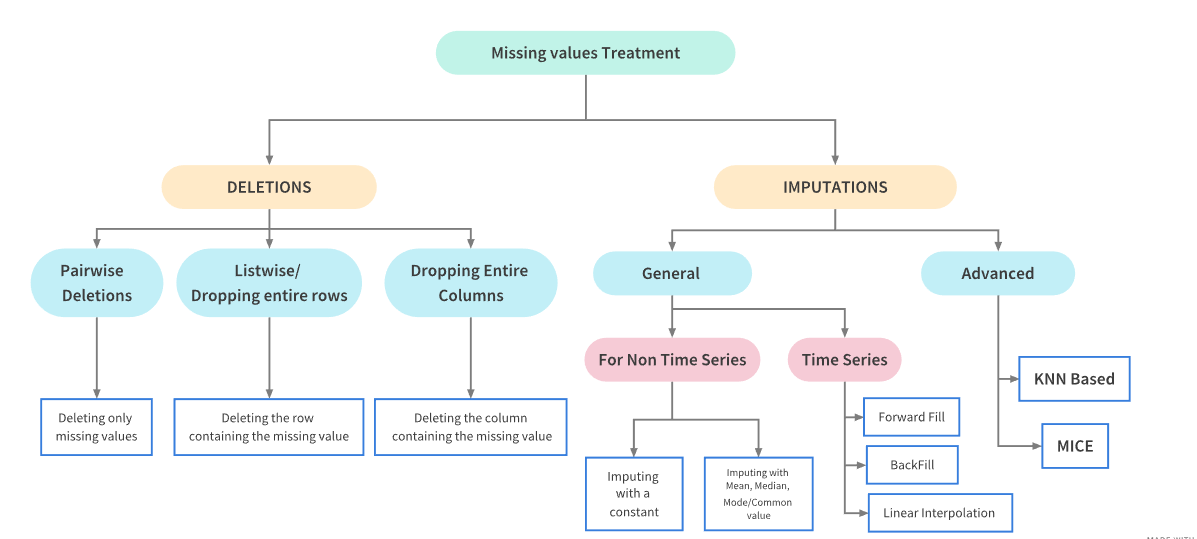

### How can the missing data mechanisms be detected?

*  Data visualization

*  Statistical tests

In [1]:
# import libraries
import pandas as pd
import numpy as np
import missingno as msno
from scipy import stats
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# import autoimpute functions and MiceImputer
from autoimpute.utils import md_pattern, proportions
from autoimpute.visuals import plot_md_locations, plot_md_percent
from autoimpute.visuals import plot_imp_dists, plot_imp_boxplots
from autoimpute.visuals import plot_imp_swarm
from autoimpute.imputations import MiceImputer

# supress warnings
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,10)

In [2]:
# read the Titanic dataset
df = pd.read_csv("./data/titanic.csv")

In [3]:
df.shape

(1309, 14)

In [4]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,Allen Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,St Louis MO
1,1,1,Allison Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,Montreal PQ / Chesterville ON
2,1,0,Allison Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal PQ / Chesterville ON
3,1,0,Allison Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,Montreal PQ / Chesterville ON
4,1,0,Allison Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,Montreal PQ / Chesterville ON


In [5]:
df.tail()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1304,3,0,Zabour Miss. Hileni,female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,Zabour Miss. Thamine,female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,Zakarian Mr. Mapriededer,male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,Zakarian Mr. Ortin,male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,Zimmerman Mr. Leo,male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [7]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
# verify missing values
missing_values_table(df)

Your selected dataframe has 14 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
body,1188,90.8
cabin,1014,77.5
boat,823,62.9
home.dest,564,43.1
age,263,20.1
embarked,2,0.2
fare,1,0.1


### Exploring missing data with `autoimpute` library

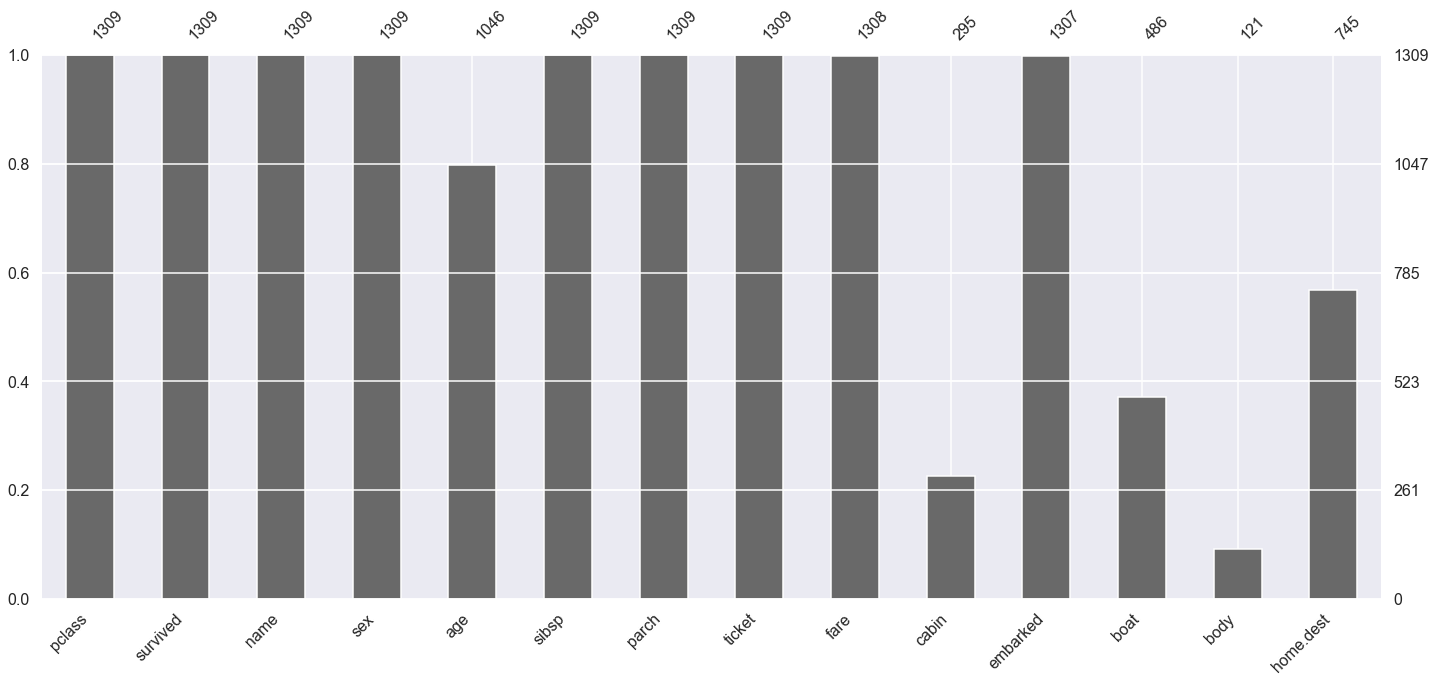

In [10]:
# plot missing values percent
plot_md_percent(df)

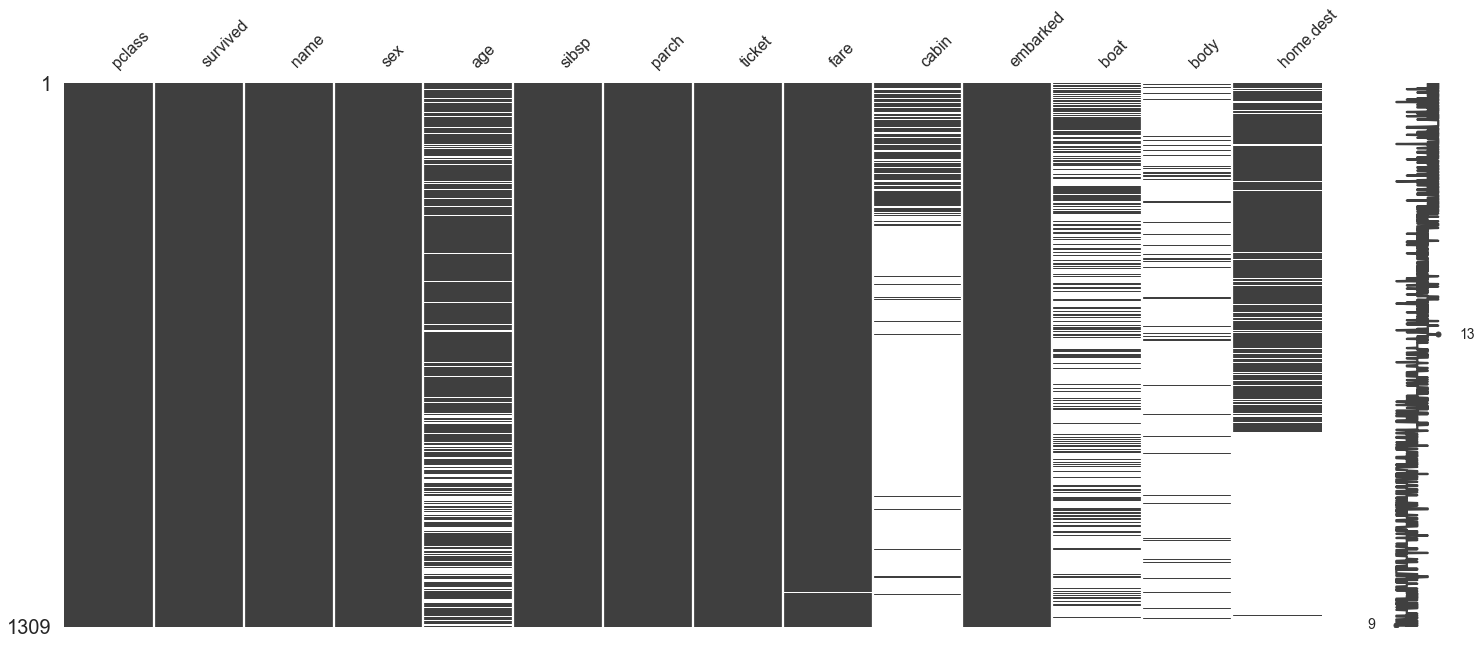

In [11]:
# plot missing values locations
plot_md_locations(df)

<AxesSubplot:>

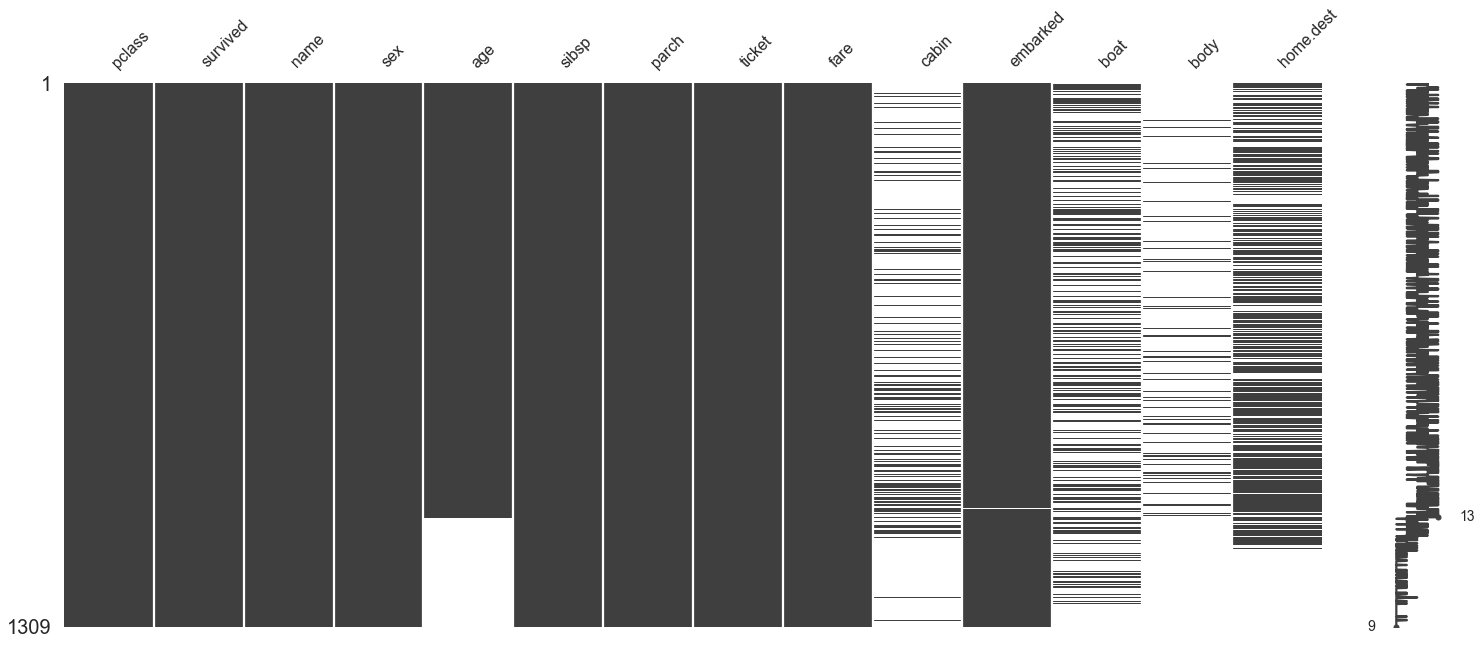

In [12]:
# `age` (sorted) and `cabin` plot
sorted = df.sort_values('age')
msno.matrix(sorted)

### What do you notice regarding missing values distribution?

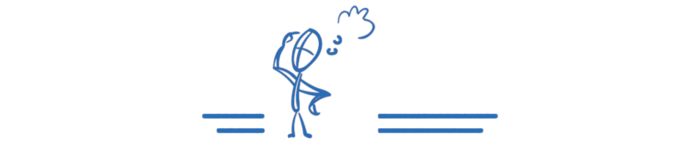

*  `body` missing values percentage is almost 91%. The information contained in this feature is to sparse to impute effectively. Solution: delete column.

*  `home.dest` predictive value for survival is dubious. Solution: delete column.

*  `boat` refers to the lifeboat for passengers that survived. Therefore, the presence of a boat number for a passenger indicates that he/she survived. 

*  `embarked` and `fare` feature seems to quality for MCAR, since there is no apparent relationship with other features.

*  `cabin` and `age` could be classified as MAR (there is no direct cause for missingness based on the observed values).

### What about MCAR?

*  In R, the `naniar` library provides a test for MCAR (mcar_test).

*  IBM/SPSS commercial package provides a test for MCAR.

*  To my knowledge, there is no implemtation in Python to test MCAR assumption.

In [13]:
# drop unnecessary features
df.drop(['body', 'home.dest'], axis=1, inplace=True)

Five features have missing values present: `boat`, `cabin`, `age`, `embarked` and `fare`.

### Heatmap

*  In `msno`, the heatmap function shows the correlation of missingness between every 2 columns.

*  A value near `-1` means if one variable appears then the other variable is very likely to be missing.

*  A value near `0` means there is no dependence between the occurrence of missing values of two variables. A value near 0 is an indication of MAR.

*  A value near `1` means if one variable appears then the other variable is very likely to be present.

<AxesSubplot:>

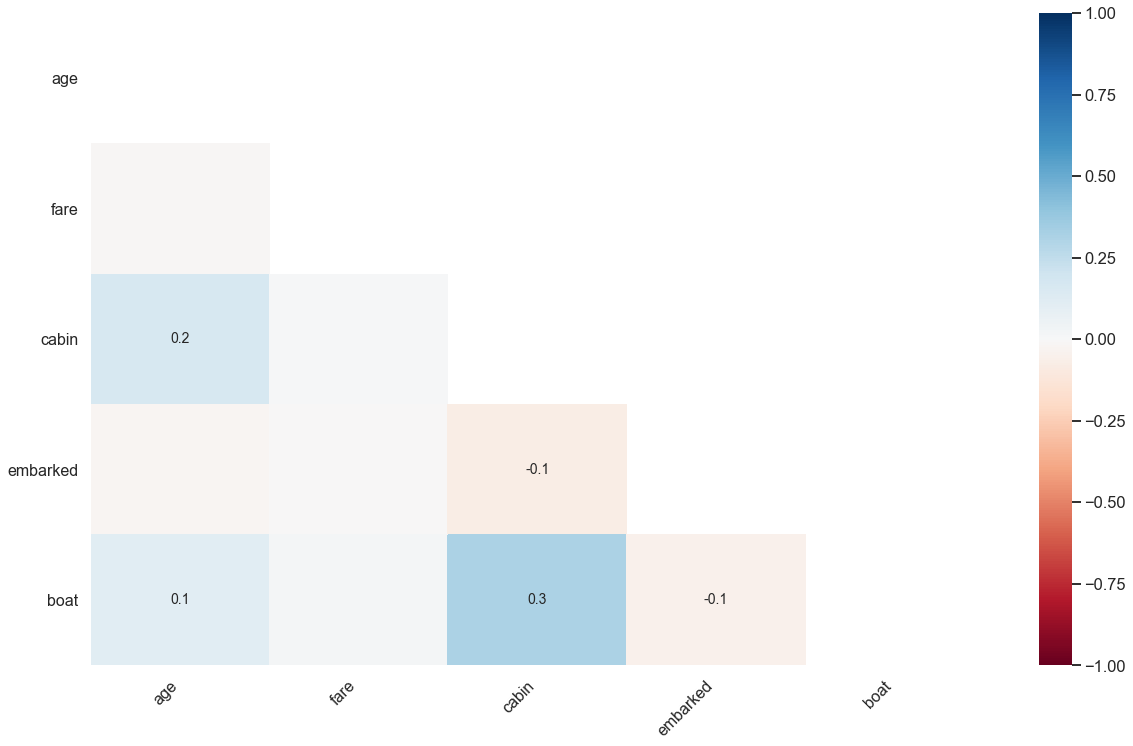

In [14]:
# heatmap
msno.heatmap(df)

There is no strong correlation between `cabin` and `age`, pointing to `MAR` mechanism.

### Exploring relationship between `survived` and `boat`

In [15]:
# convert `boat` missing/non-missing values to 0/1
df['boat_nan'] = np.where(df['boat'].isnull(), 0, 1)

In [16]:
# drop `boat`
df.drop(['boat'], axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
 11  boat_nan  1309 non-null   int32  
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 117.7+ KB


In [18]:
# crosstab `survived` and `boat`
pd.crosstab(df.survived, df.boat_nan)

boat_nan,0,1
survived,,
0,800,9
1,23,477


In [19]:
# correlation between `survived` and `boat`
print('Correlation coefficient between survived and boat: {:0.4f}'.format(df.survived.corr(df.boat_nan)))

Correlation coefficient between survived and boat: 0.9482


<AxesSubplot:>

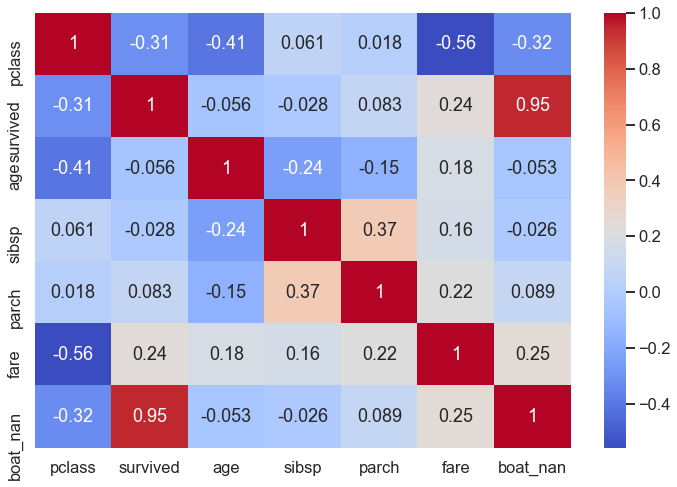

In [20]:
# correlation heatmap
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

`survived` and `boat_nan` features have a high positive correlation, which is great as a predictor to the target (`survived`). In fact, `boat_nan` has the highest correlation coefficient among potential predictors for `survived`. Even better, `boat_nan` relationship with the other feature is not that strong, avoiding the issue of multicollinearity. 

### Imputing missing values

*  `embarked` - only two missing values. Assuming MCAR. Proposed impute methodology: mode imputation.

*  `cabin` - 77% missing values. In practical terms, this feature will be a candidate for column deletion. An alternate strategy will be to use `mice` to impute the cabin first letter.

*  `age` - ~20% missing values. From extensive EDA done by data scientists, this feature is a valuable predictor for the target (`Survived`). The strategy is to use model-based approach (i.e. mice) to impute this feature.

*  `fare` - only one missing value. Assuming MAR. Since `age` is imputed using model-based approach and `Fare` is numeric, let the model impute the missing value.

### Imputing `embarked`

In [21]:
df_imp = df.copy()

In [22]:
# `embarked` value count
df_imp.embarked.value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [23]:
# use fillna to impute `embarked` missing values with mode ('S')
df_imp['embarked'].fillna(df_imp.embarked.mode()[0], inplace=True)

In [24]:
df_imp['embarked'].isnull().sum()

0

### Create `title` feature

In [25]:
df_imp['title'] = df.name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [26]:
df_imp.title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Ms            2
Major         2
Don           1
Dona          1
Countess      1
Jonkheer      1
Capt          1
Lady          1
Sir           1
Mme           1
Name: title, dtype: int64

In [27]:
# replace several titles with rare_title category
rare_title = ['Dona', 'Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']

df_imp['title'] = np.where(df_imp['title'].isin(rare_title), 'Rare Title', df_imp['title'])

# replace Mlle and Ms with Miss
df_imp['title'] = np.where(df_imp['title'].isin(['Mlle', 'Ms']), 'Miss', df_imp['title'])

# replace Mme with Mrs
df_imp['title'] = np.where(df_imp['title'].isin(['Mme']), 'Mrs', df_imp['title'])

In [28]:
df_imp.title.value_counts()

Mr            757
Miss          264
Mrs           198
Master         61
Rare Title     29
Name: title, dtype: int64

### Imputing `cabin`

In [29]:
# extract first `cabin` letter, create `deck` feature
df_imp['deck'] = df_imp['cabin'].str[0]

In [30]:
# drop unnecessary features for imputing
df_imp.drop(['name', 'ticket', 'cabin'], axis=1, inplace=True)

In [31]:
df_imp.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat_nan,title,deck
0,1,1,female,29.0000,0,0,211.3375,S,1,Miss,B
1,1,1,male,0.9167,1,2,151.5500,S,1,Master,C
2,1,0,female,2.0000,1,2,151.5500,S,0,Miss,C
3,1,0,male,30.0000,1,2,151.5500,S,0,Mr,C
4,1,0,female,25.0000,1,2,151.5500,S,0,Mrs,C


In [32]:
df_imp.deck.value_counts(dropna=False)

NaN    1014
C        94
B        65
D        46
E        41
A        22
F        21
G         5
T         1
Name: deck, dtype: int64

<AxesSubplot:xlabel='title', ylabel='age'>

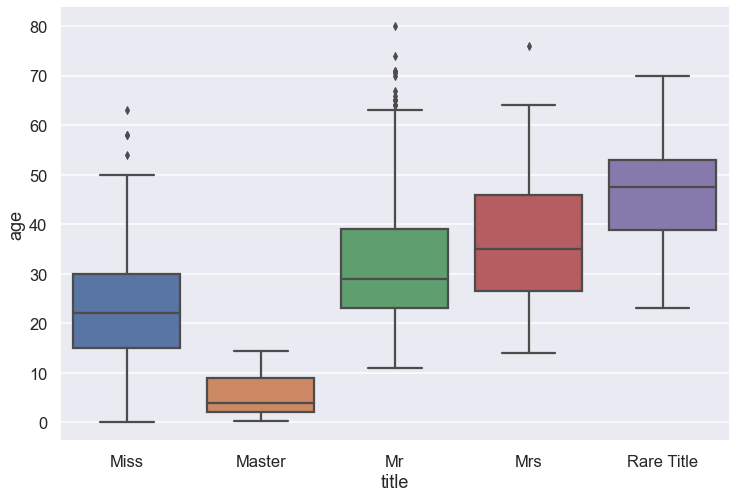

In [33]:
# explore relationship between `title` and `age`
sns.boxplot(data=df_imp, x='title', y='age')

In order to statistically test the significance of the relationship between `age` and `title`, a one-way ANOVA test is warranted. The F-statstic is the indicator for significance: p-value < 0.05 indicates **there is a  significant evidence of relationship between the two features**.

In [34]:
# one-way ANOVA for `title` and `age`
F, p = stats.f_oneway(df_imp.loc[df_imp['title'] == 'Miss', 'age'].dropna(), 
             df_imp.loc[df_imp['title'] == 'Master', 'age'].dropna(), 
             df_imp.loc[df_imp['title'] == 'Mr', 'age'].dropna(), 
             df_imp.loc[df_imp['title'] == 'Mrs', 'age'].dropna(), 
             df_imp.loc[df_imp['title'] == 'Rare Title', 'age'].dropna()
                     )

print("F-statistic: ",np.round(F,4), "\n","P-value   : ",np.round(p,4))

F-statistic:  107.9818 
 P-value   :  0.0


In [35]:
# Kruskal-Wallis nonparametric test
stats.kruskal(df_imp.loc[df_imp['title'] == 'Miss', 'age'].dropna(), 
             df_imp.loc[df_imp['title'] == 'Master', 'age'].dropna(), 
             df_imp.loc[df_imp['title'] == 'Mr', 'age'].dropna(), 
             df_imp.loc[df_imp['title'] == 'Mrs', 'age'].dropna(), 
             df_imp.loc[df_imp['title'] == 'Rare Title', 'age'].dropna()
             )

KruskalResult(statistic=286.47007231230634, pvalue=8.971910857764332e-61)

The F-statistic and Kruskal-Wallis tests values are less than 0.05 (95% confidence), indicating that `age` and `title` groups differences are significant (i.e. there is a significant relationship between these features).

<AxesSubplot:xlabel='deck', ylabel='fare'>

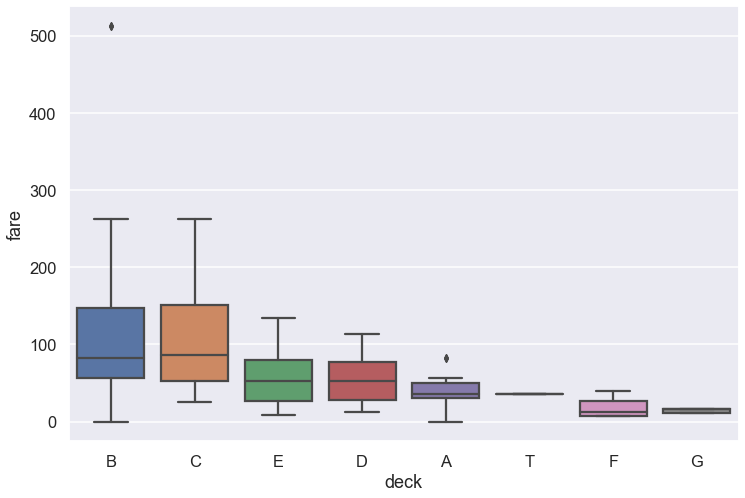

In [36]:
# explore relationship between `deck` and `fare`
sns.boxplot(data=df_imp, x='deck', y='fare')

In [37]:
# one-way ANOVA for `deck` and `fare`
F, p = stats.f_oneway(df_imp.loc[df_imp['deck'] == 'A', 'fare'].dropna(), 
             df_imp.loc[df_imp['deck'] == 'B', 'fare'].dropna(), 
             df_imp.loc[df_imp['deck'] == 'C', 'fare'].dropna(), 
             df_imp.loc[df_imp['deck'] == 'D', 'fare'].dropna(), 
             df_imp.loc[df_imp['deck'] == 'E', 'fare'].dropna(), 
             df_imp.loc[df_imp['deck'] == 'F', 'fare'].dropna(), 
             df_imp.loc[df_imp['deck'] == 'G', 'fare'].dropna())

print("F-statistic: ",np.round(F,4), "\n","P-value   : ",np.round(p,4))

F-statistic:  12.6729 
 P-value   :  0.0


In [38]:
# Kruskal-Wallis nonparametric test
stats.kruskal(df_imp.loc[df_imp['deck'] == 'A', 'fare'].dropna(), 
             df_imp.loc[df_imp['deck'] == 'B', 'fare'].dropna(), 
             df_imp.loc[df_imp['deck'] == 'C', 'fare'].dropna(), 
             df_imp.loc[df_imp['deck'] == 'D', 'fare'].dropna(), 
             df_imp.loc[df_imp['deck'] == 'E', 'fare'].dropna(), 
             df_imp.loc[df_imp['deck'] == 'F', 'fare'].dropna(), 
             df_imp.loc[df_imp['deck'] == 'G', 'fare'].dropna())

KruskalResult(statistic=93.3181864893193, pvalue=6.1896485187485675e-18)

The F-statistic and Kruskal-Wallis tests values are less than 0.05 (95% confidence), indicating that `fare` and `deck` groups differences are significant (i.e. there is a significant relationship between these features).

In [39]:
# reset_index
df_imp.reset_index(drop=True)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat_nan,title,deck
0,1,1,female,29.0000,0,0,211.3375,S,1,Miss,B
1,1,1,male,0.9167,1,2,151.5500,S,1,Master,C
2,1,0,female,2.0000,1,2,151.5500,S,0,Miss,C
3,1,0,male,30.0000,1,2,151.5500,S,0,Mr,C
4,1,0,female,25.0000,1,2,151.5500,S,0,Mrs,C
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5000,1,0,14.4542,C,0,Miss,NaN
1305,3,0,female,NaN,1,0,14.4542,C,0,Miss,NaN
1306,3,0,male,26.5000,0,0,7.2250,C,0,Mr,NaN
1307,3,0,male,27.0000,0,0,7.2250,C,0,Mr,NaN


In [42]:
# one hot encode `sex`, `embarked`, 'title'
df_imp_enc = pd.get_dummies(df_imp, columns = ['sex', 'embarked', 'title'], drop_first = True)

In [44]:
# convert deck values to numbers
deck_num = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'T': 8}
df_imp_enc['deck'] = df_imp_enc['deck'].map(deck_num)

In [45]:
df_imp_enc.head()

,pclass,survived,age,sibsp,parch,fare,boat_nan,deck,sex_male,embarked_Q,embarked_S,title_Miss,title_Mr,title_Mrs,title_Rare Title
0,1,1,29.0000,0,0,211.3375,1,2.0,0,0,1,1,0,0,0
1,1,1,0.9167,1,2,151.5500,1,3.0,1,0,1,0,0,0,0
2,1,0,2.0000,1,2,151.5500,0,3.0,0,0,1,1,0,0,0
3,1,0,30.0000,1,2,151.5500,0,3.0,1,0,1,0,1,0,0
4,1,0,25.0000,1,2,151.5500,0,3.0,0,0,1,0,0,1,0


In [46]:
df_imp_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pclass            1309 non-null   int64  
 1   survived          1309 non-null   int64  
 2   age               1046 non-null   float64
 3   sibsp             1309 non-null   int64  
 4   parch             1309 non-null   int64  
 5   fare              1308 non-null   float64
 6   boat_nan          1309 non-null   int32  
 7   deck              295 non-null    float64
 8   sex_male          1309 non-null   uint8  
 9   embarked_Q        1309 non-null   uint8  
 10  embarked_S        1309 non-null   uint8  
 11  title_Miss        1309 non-null   uint8  
 12  title_Mr          1309 non-null   uint8  
 13  title_Mrs         1309 non-null   uint8  
 14  title_Rare Title  1309 non-null   uint8  
dtypes: float64(3), int32(1), int64(4), uint8(7)
memory usage: 85.8 KB


### Use `autoimpute` to impute missing values

This library works with continuous, categorical, and time-series features. Single and multiple imputation frameworks to apply imputation method. Source: https://kearnz.github.io/autoimpute-tutorials/

In [47]:
# create the MultipleImputer
# mi = MultipleImputer(return_list=True)

# perform PMM imputation procedure
# imp_mi = mi.fit_transform(df_imp)

In [48]:
# MiceImputer
mi_mice = MiceImputer(return_list=True, seed = 42)

imp_mice = mi_mice.fit_transform(df_imp_enc)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 41 seconds.
There were 228 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 39 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 35 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 46 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 42 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 45 seconds.
The acceptance probability does not match the target. It is 0.8786319710504977, but should be close to 0.8. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 43 seconds.
The acceptance probability does not match the target. It is 0.879547464704824, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 42 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 35 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 44 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 42 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 43 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 35 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 42 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 40 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 42 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 41 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 41 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 35 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 44 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 44 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 42 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 40 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 41 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 42 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 42 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 35 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 43 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 41 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 46 seconds.


In [49]:
imp_mice

[(1,
        pclass  survived      age  sibsp  parch      fare  boat_nan  deck  \
  0          1         1  29.0000      0      0  211.3375         1   2.0   
  1          1         1   0.9167      1      2  151.5500         1   3.0   
  2          1         0   2.0000      1      2  151.5500         0   3.0   
  3          1         0  30.0000      1      2  151.5500         0   3.0   
  4          1         0  25.0000      1      2  151.5500         0   3.0   
  ...      ...       ...      ...    ...    ...       ...       ...   ...   
  1304       3         0  14.5000      1      0   14.4542         0   7.0   
  1305       3         0   3.0000      1      0   14.4542         0   7.0   
  1306       3         0  26.5000      0      0    7.2250         0   5.0   
  1307       3         0  27.0000      0      0    7.2250         0   7.0   
  1308       3         0  29.0000      0      0    7.8750         0   7.0   
  
        sex_male  embarked_Q  embarked_S  title_Miss  title_Mr  titl

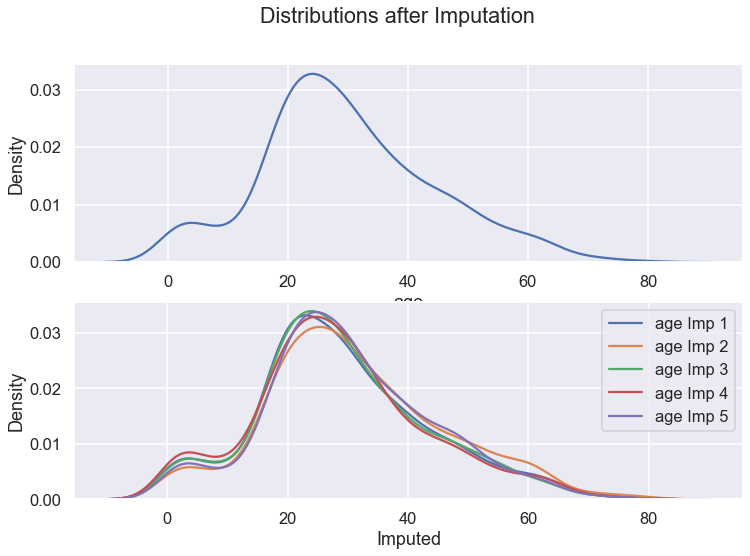

In [50]:
# distribution plot for mice imputation `age`
plot_imp_dists(d = imp_mice, 
               mi = mi_mice, 
               imp_col = 'age'
              )

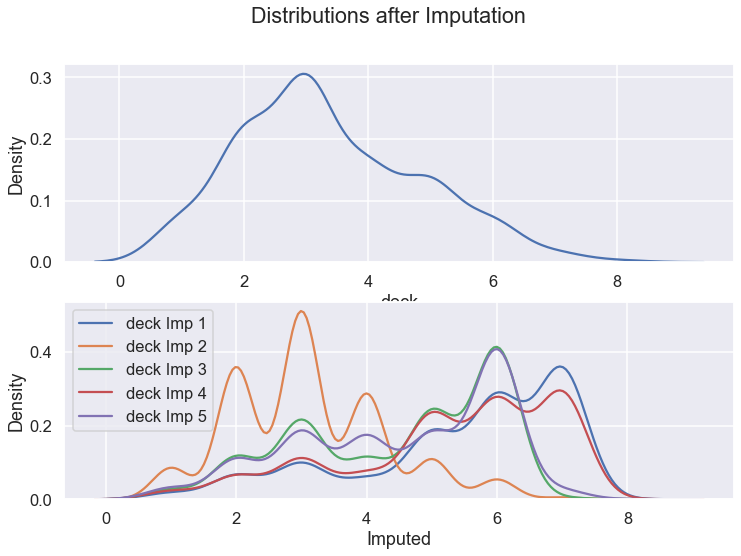

In [62]:
# distribution plot for mice imputation `deck`
plot_imp_dists(d = imp_mice, 
               mi = mi_mice, 
               imp_col = 'deck'
              )

In [51]:
# helper functions used throughout this project
print_header = lambda msg: print(f"{msg}\n{'-'*len(msg)}")

In [60]:
print_header("Results from Mice Imputer on feature `age` five times")
imps_1 = pd.concat([imp_mice[i][1]['age'].to_frame() for i in range(len(imp_mice))], axis=1)
imps_2 = pd.concat([imp_mice[i][1]['deck'].to_frame() for i in range(len(imp_mice))], axis=1)
conc = pd.concat([df_imp, imps_1, imps_2], axis=1)
conc = conc.set_axis(['pclass', 'survived', 'sex', 'age_orig', 'sibsp', 'parch', 'fare', 
                      'embarked', 'boat_nan', 'title', 'deck', 'age_imp_1', 'age_imp_2', 
                      'age_imp_3', 'age_imp_4', 'age_imp_5', 'deck_imp_1', 'deck_imp_2', 
                      'deck_imp_3', 'deck_imp_4', 'deck_imp_5'], axis = 1)
conc

Results from Mice Imputer on feature `age` five times
-----------------------------------------------------


,pclass,survived,sex,age_orig,sibsp,parch,fare,embarked,boat_nan,title,...,age_imp_1,age_imp_2,age_imp_3,age_imp_4,age_imp_5,deck_imp_1,deck_imp_2,deck_imp_3,deck_imp_4,deck_imp_5
0,1,1,female,29.0000,0,0,211.3375,S,1,Miss,...,29.0000,29.0000,29.0000,29.0000,29.0000,2.0,2.0,2.0,2.0,2.0
1,1,1,male,0.9167,1,2,151.5500,S,1,Master,...,0.9167,0.9167,0.9167,0.9167,0.9167,3.0,3.0,3.0,3.0,3.0
2,1,0,female,2.0000,1,2,151.5500,S,0,Miss,...,2.0000,2.0000,2.0000,2.0000,2.0000,3.0,3.0,3.0,3.0,3.0
3,1,0,male,30.0000,1,2,151.5500,S,0,Mr,...,30.0000,30.0000,30.0000,30.0000,30.0000,3.0,3.0,3.0,3.0,3.0
4,1,0,female,25.0000,1,2,151.5500,S,0,Mrs,...,25.0000,25.0000,25.0000,25.0000,25.0000,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5000,1,0,14.4542,C,0,Miss,...,14.5000,14.5000,14.5000,14.5000,14.5000,7.0,2.0,5.0,7.0,6.0
1305,3,0,female,NaN,1,0,14.4542,C,0,Miss,...,3.0000,18.0000,4.0000,0.8333,4.0000,7.0,1.0,6.0,7.0,5.0
1306,3,0,male,26.5000,0,0,7.2250,C,0,Mr,...,26.5000,26.5000,26.5000,26.5000,26.5000,5.0,3.0,5.0,6.0,5.0
1307,3,0,male,27.0000,0,0,7.2250,C,0,Mr,...,27.0000,27.0000,27.0000,27.0000,27.0000,7.0,3.0,5.0,5.0,6.0


In [74]:
# output to csv
conc.to_csv("df_imp_auto.csv", index = False)

In [61]:
conc[(conc['age_orig'].isna()) & (conc['title'] == 'Master')]

,pclass,survived,sex,age_orig,sibsp,parch,fare,embarked,boat_nan,title,...,age_imp_1,age_imp_2,age_imp_3,age_imp_4,age_imp_5,deck_imp_1,deck_imp_2,deck_imp_3,deck_imp_4,deck_imp_5
672,3,0,male,NaN,0,0,7.2292,C,0,Master,...,3.00,11.0000,0.8333,3.0,2.0000,6.0,2.0,6.0,6.0,6.0
900,3,0,male,NaN,1,2,23.4500,S,0,Master,...,7.00,0.1667,0.4167,1.0,7.0000,7.0,3.0,5.0,7.0,6.0
954,3,0,male,NaN,3,1,25.4667,S,0,Master,...,2.00,2.0000,9.0000,11.0,9.0000,7.0,3.0,6.0,7.0,6.0
1034,3,1,male,NaN,1,1,15.2458,C,1,Master,...,12.00,0.6667,3.0000,9.0,4.0000,6.0,4.0,6.0,7.0,5.0
1035,3,1,male,NaN,1,1,15.2458,C,1,Master,...,9.00,13.0000,3.0000,9.0,4.0000,7.0,4.0,5.0,7.0,5.0
1121,3,1,male,NaN,1,1,22.3583,C,1,Master,...,9.00,17.0000,3.0000,11.0,2.0000,7.0,4.0,5.0,7.0,6.0
1170,3,0,male,NaN,8,2,69.5500,S,0,Master,...,11.00,0.4167,11.0000,14.5,11.0000,7.0,2.0,6.0,7.0,5.0
1262,3,0,male,NaN,1,1,14.5000,S,0,Master,...,0.75,9.0000,2.0000,7.0,0.6667,7.0,3.0,6.0,5.0,6.0


In [63]:
from autoimpute.analysis import MiLinearRegression

In [66]:
simple_lm = MiLinearRegression()

In [69]:
X = df_imp_enc.drop('survived', axis = 1)
y = df_imp_enc['survived']

In [70]:
simple_lm.fit(X, y)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 39 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 40 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 35 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 39 seconds.
There were 102 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7203360270302797, but should be close to 0.8. Try to increase the number of tuning steps.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 39 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 27 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.
There were 7 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 26 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 29 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.
There were 290 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6974784183559829, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 27 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 23 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.
There were 17 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 27 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 33 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 27 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 24 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [σ, beta, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.


MiLinearRegression(mi=MiceImputer())

In [71]:
simple_lm.summary()

,coefs,std,vw,vb,vt,dfcom,dfadj,lambda,riv,fmi,eff
const,0.177484,0.090797,7.566944e-03,5.642367e-04,8.244028e-03,1294.0,395.320762,0.082130,0.089479,0.086739,0.982948
pclass,-0.012343,0.022353,8.292359e-05,3.472881e-04,4.996693e-04,1294.0,5.600021,0.834043,5.025659,0.872638,0.851406
age,-0.000373,0.000413,1.403960e-07,2.502368e-08,1.704244e-07,1294.0,114.929911,0.176198,0.213884,0.190169,0.963360
sibsp,-0.008494,0.004736,2.090996e-05,1.267351e-06,2.243078e-05,1294.0,505.174057,0.067801,0.072732,0.071469,0.985908
parch,-0.012512,0.005510,3.023984e-05,9.860046e-08,3.035816e-05,1294.0,1280.709720,0.003897,0.003913,0.005449,0.998911
fare,0.000006,0.000109,1.088882e-08,8.090902e-10,1.185972e-08,1294.0,397.059328,0.081866,0.089166,0.086456,0.983003
boat_nan,0.895653,0.011240,1.134968e-04,1.070295e-05,1.263404e-04,1294.0,290.260853,0.101658,0.113162,0.107785,0.978898
deck,0.002172,0.015024,1.965360e-05,1.717140e-04,2.257104e-04,1294.0,4.603053,0.912926,10.484427,0.935831,0.842342
sex_male,-0.067052,0.080616,6.417440e-03,6.792873e-05,6.498955e-03,1294.0,1214.842234,0.012543,0.012702,0.014164,0.997175
embarked_Q,0.028630,0.018478,3.125534e-04,2.408132e-05,3.414510e-04,1294.0,379.336223,0.084632,0.092456,0.089420,0.982430


In [73]:
predictions = simple_lm.predict(X)
predictions

ValueError: Data passed to make predictions can't contain missingness.

In [42]:
# amount of missing data before imputation
print("Amount of data missing after imputation takes place")
pd.DataFrame(imp_mi.isnull().sum(), columns=["records missing"]).T

Amount of data missing after imputation takes place


AttributeError: 'generator' object has no attribute 'isnull'

### Imputation quality (`age`)

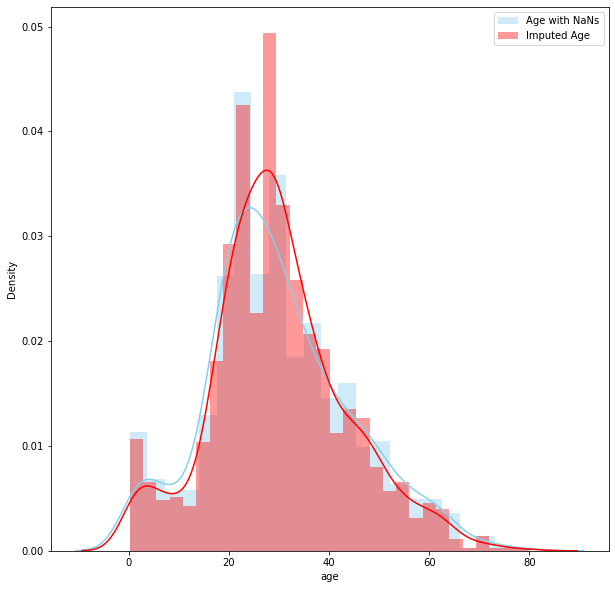

In [42]:
# distplot for `age` and `age_imp`
sns.distplot(df_imp['age'] , color="skyblue", label='Age with NaNs')
sns.distplot(df_with_missing_imputed['age'] , color="red", label='Imputed Age')
plt.legend()

In [56]:
deck_nan = df_with_missing_imputed[df_with_missing_imputed['deck'].isnull()]

In [57]:
deck_nan

,pclass,survived,sex,age,sibsp,parch,fare,embarked,title,deck
9,1.0,0.0,male,71.000000,0.0,0.0,49.5042,C,Mr,NaN
13,1.0,1.0,female,26.000000,0.0,0.0,78.8500,S,Miss,NaN
15,1.0,0.0,male,46.411680,0.0,0.0,25.9250,S,Mr,NaN
23,1.0,1.0,female,42.000000,0.0,0.0,227.5250,C,Miss,NaN
25,1.0,0.0,male,25.000000,0.0,0.0,26.0000,C,Mr,NaN
...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,female,14.500000,1.0,0.0,14.4542,C,Miss,NaN
1305,3.0,0.0,female,17.498078,1.0,0.0,14.4542,C,Miss,NaN
1306,3.0,0.0,male,26.500000,0.0,0.0,7.2250,C,Mr,NaN
1307,3.0,0.0,male,27.000000,0.0,0.0,7.2250,C,Mr,NaN


In [58]:
# instantiate  model  and  train  imputer
model = datawig.SimpleImputer(
    input_columns = ['survived', 'age', 'fare', 'title'], 
    output_column = 'deck').fit(df_with_missing_imputed)

In [59]:
# imputing missing values in `deck`
deck_imputed = model.predict(deck_nan)

In [60]:
deck_imputed.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,title,deck,deck_imputed,deck_imputed_proba
9,1.0,0.0,male,71.000000,0.0,0.0,49.5042,C,Mr,NaN,B,0.284536
13,1.0,1.0,female,26.000000,0.0,0.0,78.8500,S,Miss,NaN,B,0.324523
15,1.0,0.0,male,46.411680,0.0,0.0,25.9250,S,Mr,NaN,C,0.232340
23,1.0,1.0,female,42.000000,0.0,0.0,227.5250,C,Miss,NaN,B,0.546687
25,1.0,0.0,male,25.000000,0.0,0.0,26.0000,C,Mr,NaN,F,0.403355
35,1.0,1.0,female,45.000000,0.0,0.0,262.3750,C,Miss,NaN,B,0.650749
37,1.0,1.0,male,40.388365,0.0,0.0,26.5500,S,Mr,NaN,E,0.285986
40,1.0,0.0,male,51.193272,0.0,0.0,39.6000,C,Rare Title,NaN,B,0.383419
46,1.0,0.0,male,47.229886,0.0,0.0,31.0000,S,Mr,NaN,C,0.244527
48,1.0,1.0,female,53.000000,0.0,0.0,27.4458,C,Mrs,NaN,C,0.378446


In [61]:
deck_imputed.deck_imputed.value_counts()

F    620
E     94
G     78
A     76
C     75
D     53
B     18
Name: deck_imputed, dtype: int64

In [62]:
# add `deck_imputed` from deck_imputed to df_with_missin_data
df_with_missing_imputed['deck_imputed'] = deck_imputed['deck_imputed']

In [63]:
# `deck` fillna from `deck_imputed` imputed values
df_with_missing_imputed.deck.fillna(df_with_missing_imputed.deck_imputed, inplace=True)

# drop `deck_imputed`
df_with_missing_imputed.drop('deck_imputed', axis=1, inplace=True)

In [64]:
df_with_missing_imputed.head(20)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,title,deck
0,1.0,1.0,female,29.00000,0.0,0.0,211.3375,S,Miss,B
1,1.0,1.0,male,0.91670,1.0,2.0,151.5500,S,Master,C
2,1.0,0.0,female,2.00000,1.0,2.0,151.5500,S,Miss,C
3,1.0,0.0,male,30.00000,1.0,2.0,151.5500,S,Mr,C
4,1.0,0.0,female,25.00000,1.0,2.0,151.5500,S,Mrs,C
5,1.0,1.0,male,48.00000,0.0,0.0,26.5500,S,Mr,E
6,1.0,1.0,female,63.00000,1.0,0.0,77.9583,S,Miss,D
7,1.0,0.0,male,39.00000,0.0,0.0,0.0000,S,Mr,A
8,1.0,1.0,female,53.00000,2.0,0.0,51.4792,S,Mrs,C
9,1.0,0.0,male,71.00000,0.0,0.0,49.5042,C,Mr,B


In [66]:
df_with_missing_imputed.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
title       0
deck        0
dtype: int64

In [67]:
df_with_missing_imputed.deck.value_counts()

F    641
C    169
E    135
D     99
A     98
B     83
G     83
T      1
Name: deck, dtype: int64

In [68]:
# output to csv
df_with_missing_imputed.to_csv('df_imp_datawig.csv', index=False)

In [52]:
# split df_imp_enc
# df_train, df_test = datawig.utils.random_split(df_imp, split_ratios=[0.8, 0.2])

In [53]:
# to impute `age`, the input_columns are `survived`, `title`, `pclass`, `sibsp` and `parch` (see correlation coefficients)
#Initialize a SimpleImputer model
# imputer = datawig.SimpleImputer(
#     input_columns=['survived', 'title', 'pclass','sibsp','parch'], # column(s) containing information about the column we want to impute
#     output_column= 'age', # the column we'd like to impute values for
#     output_path = 'imputer_model' # stores model data and metrics
#     )

In [54]:
# fit an imputer model on the train data
# imputer.fit(train_df=df_train, num_epochs=50)

In [55]:
# impute missing values and return original dataframe with predictions
# imputed = imputer.predict(df_test)

In [56]:
# imputed.head(10)

In [57]:
# imputed.shape